## 1.3.2 Arithmetic Operations on Images

In [14]:
import cv2
import numpy as np

In [15]:
from matplotlib import pyplot as plt

In [16]:
x = 250
y = 10
x+y

260

In [17]:
x = np.uint8([250])

In [18]:
print(x)

[250]


In [19]:
y = np.uint8([10])

In [20]:
print(y)

[10]


In [21]:
x+y

array([4], dtype=uint8)

In [22]:
cv2.add(x,y)

array([[255]], dtype=uint8)

In [23]:
img1 = cv2.imread('image1.jpg')
img2 = cv2.imread('image2.jpg')

In [24]:
w = 0.5
dst = cv2.addWeighted(img1,w,img2,1-w,0)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
def nothing(x):
    pass

In [26]:
cv2.namedWindow('image')
# create trackbars for color change
cv2.createTrackbar('weight', 'image',0,255,nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    # get current positions of four trackbars
    weight = cv2.getTrackbarPos('weight','image')
    dst = cv2.addWeighted(img1,weight/255,img2,1-weight/255,0)
    cv2.imshow('image',dst)
    
cv2.destroyAllWindows()

In [27]:
# Load two images
img1 = cv2.imread('image3.jpg')
img2 = cv2.imread('cv.png')

In [28]:
def pltImage(img):
    plt.imshow(img)
    plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
    plt.show()

In [29]:
rows,cols,channels = img2.shape
print(rows,cols,channels)

580 822 3


In [30]:
roi = img1[0:rows, 0:cols ]

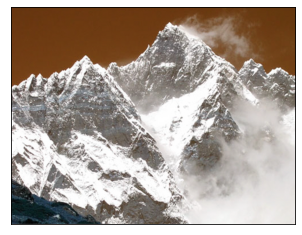

In [31]:
pltImage(img1)

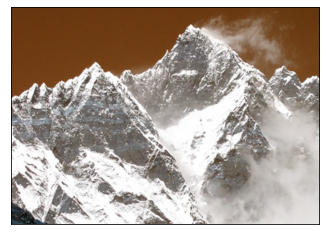

In [32]:
pltImage(roi)

In [33]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

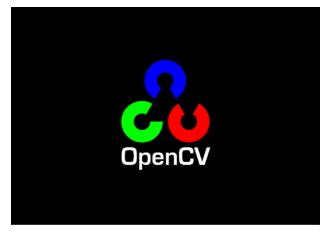

In [34]:
pltImage(img2)

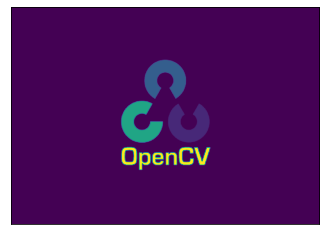

In [35]:
pltImage(img2gray)

In [36]:
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)

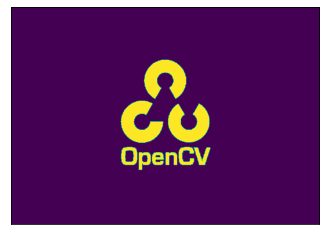

In [41]:
pltImage(mask)

In [37]:
mask_inv = cv2.bitwise_not(mask)

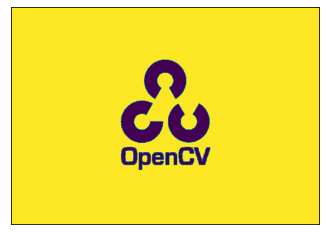

In [42]:
pltImage(mask_inv)

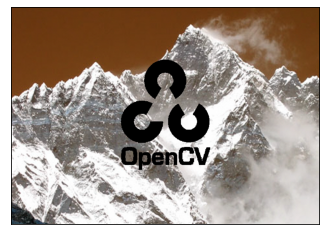

In [43]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
pltImage(img1_bg)

In [38]:
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

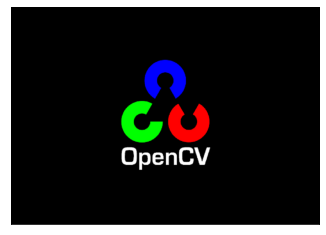

In [44]:
pltImage(img2_fg)

In [38]:
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)

In [38]:
img1[0:rows, 0:cols ] = dst

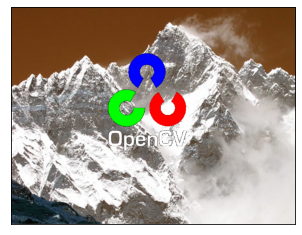

In [45]:
pltImage(img1)

In [39]:
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()